In [1]:
import os
import sys
sys.path.insert(0, '..') # incluir modulos de la parent folder
import metnum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

# Intención
En esta notebook hacemos un pequeño análisis de la calidad de los resultados generados por cada técnica (KNN, KNN+PCA) a medida que varía el tamaño del conjunto de entrenamiento. En primer lugar, estudiamos el comportamiento de algunas métricas para cada tecnica por separado. Luego, las comparamos entre sí.
Se intentan responder preguntas como:
* ¿Cómo se relacionan la técnicas con el tamaño del conjunto de entrenamiento?
* ¿Podemos jerarquizar las técnicas? ¿Habrá tamaños para los cuales una es más adecuada que la otra?
* ¿Existe un tamaño ópitmo para el conjunto de entrenamiento?

## El experimento
Se llevaron a cabo una serie de corridas variando las dimensiones previamente comentadas. En base a los observado en la notebook `data_size_parametros_optimos`, se decidió experimentar únicamente con los parámetros óptimos de cada técnica. Entonces,
* Se experimentó con trainsets de tamaños entre 6000 y 33600 elementos, con intervalos de 6000 elementos. 
* En el caso del método KNN, se tomó k=3.
* Por otro lado, cuando se experimentó con KNN y PCA, se utilizó k=3 y alfa=35.

En todos los casos se tomó registro de las siguientes métricas: accuracy, kappa de cohen, f1, precision y recall. Además, para que la evaluacion resulte más robusta se realizó validación cruzada con 10 folds.

# Caso KNN

Para replicar el experimento sobre esta técnica:

> ./knn 42000 6000 3 10

Los resultados se almacenan en el directorio `knn_results/`.

## Recuperar resultados

Primero, levantamos los resultados del experimento

In [2]:
knn_data_files = os.listdir('knn_results')

def load_files(filenames):
    for filename in filenames:
        yield pd.read_csv(f"knn_results/{filename}")

knn_data = pd.concat(load_files(knn_data_files), ignore_index=True)
knn_data = knn_data.drop(knn_data[knn_data.knn != 3].index)

knn_data.describe()

,accuracy,cohen_kappa,f1,kfold,knn,precision,predict_time,recall,train_size
count,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000
mean,0.957102,0.952282,0.957080,10.0,3.0,0.957885,108.194322,0.957102,20600.000000
std,0.011228,0.012510,0.011233,0.0,0.0,0.010702,80.501537,0.011228,9766.771755
min,0.920000,0.911024,0.919995,10.0,3.0,0.921749,10.055021,0.920000,6000.000000
25%,0.953125,0.947853,0.953118,10.0,3.0,0.954363,31.046588,0.953125,12000.000000
50%,0.960417,0.955994,0.960398,10.0,3.0,0.961049,94.916812,0.960417,21000.000000
75%,0.964286,0.960289,0.964225,10.0,3.0,0.964615,187.249252,0.964286,30000.000000
max,0.970833,0.967579,0.970814,10.0,3.0,0.970956,233.295151,0.970833,33600.000000


Luego, los agrupamos por el tamaño del set de entrenamiento y calculamos la media para resolver las métricas de los distintos folds.

In [3]:
knn_grouped = knn_data.groupby(['train_size']).mean()
knn_grouped = knn_grouped.drop(['knn', 'kfold', 'predict_time'], axis=1)

knn_grouped

,accuracy,cohen_kappa,f1,precision,recall
train_size,,,,,
6000,0.937667,0.930610,0.937694,0.939523,0.937667
12000,0.952000,0.946601,0.951963,0.953092,0.952000
18000,0.960333,0.955882,0.960278,0.960878,0.960333
24000,0.962208,0.957975,0.962181,0.962681,0.962208
30000,0.964333,0.960344,0.964316,0.964719,0.964333
33600,0.966071,0.962280,0.966050,0.966415,0.966071


## Análisis

Graficamos las métricas en función del tamaño del conjunto de entrenamiento. Recordemos que estos resultados se obtuvieron de knn con k=3.

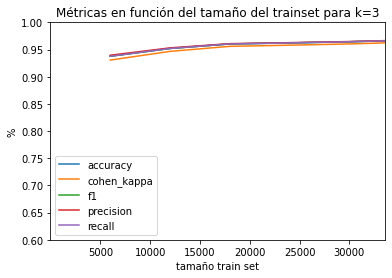

In [4]:
metrics = knn_grouped.columns.values

def plot_metrics(metrics, yd=0.6, yh=1, xd=1):
    xs = knn_grouped.index.values
    
    plt.title("Métricas en función del tamaño del trainset para k=3")
    plt.xlabel("tamaño train set")
    plt.ylabel("%")
    

    for metric in metrics:
        ys = []
        for x in xs:
            ys.append(knn_grouped.loc[x][metric])
        plt.plot(xs, ys)

    plt.axis([xd, xs[-1], yd, yh])
    plt.gca().legend(tuple(metrics))
    plt.show()


plot_metrics(metrics)

A simple vista notamos que el comportamiento de las métricas es compartido. Escojamos algunas e incrementemos la escala:

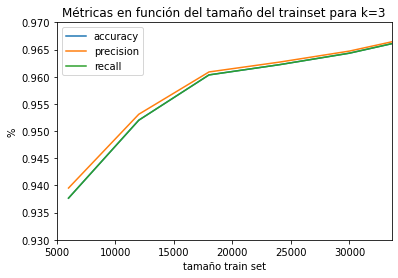

In [5]:
few_metrics = ['accuracy', 'precision', 'recall']

plot_metrics(few_metrics, yd=0.93, yh=0.97, xd=5000)

Observamos que:
* la calidad de las predicciones aumenta a la par con el tamaño del conjunto de entrenamiento.
* a partir de 18000 el crecimiento es menos drástico.

# Caso KNN+PCA

# Caso KNN

Para replicar el experimento sobre esta técnica:

> ./knn_pca 42000 6000 3 35 10

Los resultados se almacenan en el directorio `knn_results_pca/`.

## Recuperar resultados

Primero, levantamos los resultados del experimento

In [6]:
knn_pca_data_files = os.listdir('knn_pca_results')

def load_files(filenames):
    for filename in filenames:
        yield pd.read_csv(f"knn_pca_results/{filename}")

knn_pca_data = pd.concat(load_files(knn_pca_data_files), ignore_index=True)
knn_pca_data = knn_pca_data.drop(knn_pca_data[(knn_pca_data.knn != 3) | (knn_pca_data.alpha != 35)].index)

knn_pca_data.describe()

,accuracy,alpha,cohen_kappa,f1,kfold,knn,precision,recall,train_size
count,60.000000,60.0,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000
mean,0.965410,35.0,0.961526,0.965437,10.0,3.0,0.965864,0.965410,20600.000000
std,0.009149,0.0,0.010191,0.009137,0.0,0.0,0.008823,0.009149,9766.771755
min,0.935000,35.0,0.927700,0.935414,10.0,3.0,0.937092,0.935000,6000.000000
25%,0.962083,35.0,0.957826,0.962123,10.0,3.0,0.962660,0.962083,12000.000000
50%,0.968333,35.0,0.964777,0.968311,10.0,3.0,0.968492,0.968333,21000.000000
75%,0.972039,35.0,0.968914,0.972090,10.0,3.0,0.972248,0.972039,30000.000000
max,0.976786,35.0,0.974196,0.976802,10.0,3.0,0.976913,0.976786,33600.000000


Luego, los agrupamos por el tamaño del set de entrenamiento y calculamos la media para resolver las métricas de los distintos folds.

In [7]:
knn_pca_grouped = knn_pca_data.groupby(['train_size']).mean()
knn_pca_grouped = knn_pca_grouped.drop(['knn', 'alpha', 'kfold'], axis=1)

knn_pca_grouped

,accuracy,cohen_kappa,f1,precision,recall
train_size,,,,,
6000,0.950167,0.944527,0.950241,0.951309,0.950167
12000,0.961333,0.956989,0.961361,0.961930,0.961333
18000,0.967333,0.963671,0.967346,0.967634,0.967333
24000,0.970250,0.966920,0.970266,0.970515,0.970250
30000,0.971233,0.968019,0.971254,0.971475,0.971233
33600,0.972143,0.969031,0.972154,0.972323,0.972143


## Análisis

Graficamos las métricas en función del tamaño del conjunto de entrenamiento. Recordemos que estos resultados se obtuvieron de knn con k=3 y alfa=35.

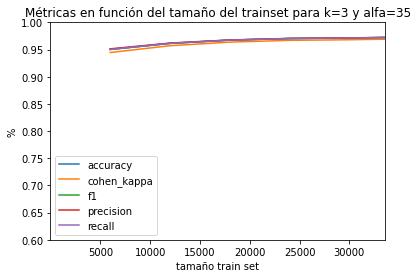

In [8]:
metrics = knn_pca_grouped.columns.values

def plot_metrics(metrics, yd=0.6, yh=1, xd=1):
    xs = knn_pca_grouped.index.values
    
    plt.title("Métricas en función del tamaño del trainset para k=3 y alfa=35")
    plt.xlabel("tamaño train set")
    plt.ylabel("%")
    

    for metric in metrics:
        ys = []
        for x in xs:
            ys.append(knn_pca_grouped.loc[x][metric])
        plt.plot(xs, ys)

    plt.axis([xd, xs[-1], yd, yh])
    plt.gca().legend(tuple(metrics))
    plt.show()


plot_metrics(metrics)

En este caso también notamos que el comportamiento de las métricas es compartido. Escojamos algunas e incrementemos la escala:

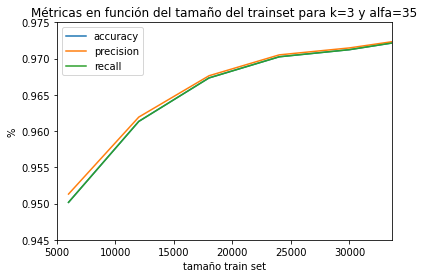

In [9]:
few_metrics = ['accuracy', 'precision', 'recall']

plot_metrics(few_metrics, yd=0.945, yh=0.975, xd=5000)

Nuevamente observamos que:
* la calidad de las predicciones aumenta a la par con el tamaño del conjunto de entrenamiento.
* a partir de 18000 el crecimiento es menos drástico.

# Comparación

Graficamos el accuracy de cada técnica en función del tamaño del trainset.

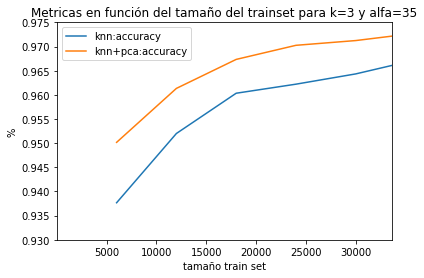

In [10]:
few_metrics = [
                 'accuracy' 
               #, 'precision'
               #, 'recall'
              ]

def plot_metrics(metrics, yd=0.6, yh=1, xd=1):
    xs = knn_pca_grouped.index.values
    
    plt.title("Metricas en función del tamaño del trainset para k=3 y alfa=35")
    plt.xlabel("tamaño train set")
    plt.ylabel("%")
    

    for metric in metrics:
        ys = []
        ys_pca = []
        for x in xs:
            ys.append(knn_grouped.loc[x][metric])
            ys_pca.append(knn_pca_grouped.loc[x][metric])
        plt.plot(xs, ys, label=f"knn:{metric}")
        plt.plot(xs, ys_pca, label=f"knn+pca:{metric}")

    plt.axis([xd, xs[-1], yd, yh])
    plt.legend()
    plt.show()
    
plot_metrics(few_metrics, yd=0.93, yh=0.975)

Observamos:
* El crecimiento en función del tamaño del set de entrenamiento es similar en ambos casos.
* Para todos los train sets hay una diferencia de ~0,1 entre los valores de accuracy de las técnicas .
* La calidad de las predicciones parece ser mayor al combinar KNN con PCA.

De yapa, graficamos precision y recall.

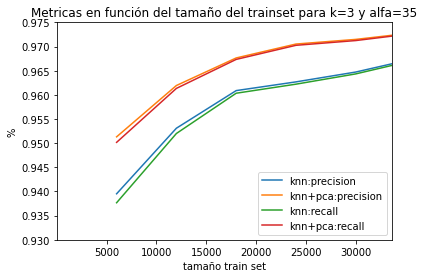

In [11]:
plot_metrics(['precision', 'recall'] , yd=0.93, yh=0.975)